# Using Google Maps API to locate nearest road formed by given gps points:

In [41]:
# PUT YOUR GOOGLE API KEY HERE:-
API_KEY = "" # Put your API KEY HERE

In [42]:
# LOADING APPROPRIATE MODULES:-
import googlemaps
import requests
import json
import polyline
import pandas as pd
import matplotlib.pyplot as plt

## FORMULATING THE PROBLEM:-

In [43]:
# SUPPOSE THAT WE HAVE THE FOLLOWING LIST OF POINTS DESCRIBED IN THE FORM (latitude, longitude)
# Note: This is the list of raw points that we have. They need not coincide with Google datapoints.
# Caution: At most 100 points can be given in this list.
points_list = [(57.222008539153045,-2.1972760501882154), (57.21266,-2.2368768), (57.188484168553316,-2.2163043274098717)]

In [44]:
# To use this list of points in a google api, we need to convert it into a string of the form: 'latitude,longitude|'


#1. We specify some useful functions:-
LComma = lambda a : a + ','
LPipe = lambda a : a + '|'


#2. We make the string we need:-
points_string = ''
for i in range(len(points_list)):
    points_string = points_string + LComma(str(points_list[i][0]))
    points_string = points_string + LPipe(str(points_list[i][1]))
# In order to correctly pass, this string should not end with the pipe character ('|')
# So, I am removing the pipe character:
points_string = points_string[0:len(points_string)-1]

#### NOW, WE NEED TO USE THESE GIVEN POINTS TO:
#### 1. FIND POINTS IN GOOGLE'S DATABASE THAT ARE CLOSEST TO THESE POINTS SO THAT WE CAN GET ADDITIONAL DATA, IF NEEDED.
#### 2. FIND POINTS IN GOOGLE'S DATABASE THAT DEFINE CLOSEST ROAD GEOMETRY.
#### 3. MAKE A MAP SHOWING THE CLOSEST ROAD GEOMETRY THAT THESE POINTS SPECIFY.

## 1. FINDING CORRESPONDING POINTS IN GOOGLE'S DATABASE:-
### FOR THIS, WE WILL USE 'nearestRoads' API:

In [45]:
# Preparing to call the api properly:
nearestRoads_web = 'https://roads.googleapis.com/v1/nearestRoads?'
nearest_road_url = nearestRoads_web + 'points=' + points_string + '&key=' + API_KEY

In [46]:
# CALLING THE API AND GETTING THE CLOSEST POINTS THAT WE NEEDED.

payload={}
headers = {}

response = requests.request("GET", nearest_road_url, headers=headers, data=payload)

Closest_Points = json.loads(response.text) # Closest_Points is a json called snappedpoints

In [47]:
# The points that we had initially, have now been "snapped" to the points that are nearest
# in the dataset of points that are available on googlemaps.

# This is a list of dictionaries in google's database corresponding to our points.
Closest_Points_List = Closest_Points["snappedPoints"]
Closest_Points_List

[{'location': {'latitude': 57.22222845887919,
   'longitude': -2.1974864280603668},
  'originalIndex': 0,
  'placeId': 'ChIJiwGzDAYThEgRMz_xpWYgQUk'},
 {'location': {'latitude': 57.21264010234519, 'longitude': -2.236875463712533},
  'originalIndex': 1,
  'placeId': 'ChIJR-VuF4EThEgRPAQ9DtbjjJo'},
 {'location': {'latitude': 57.21264010234519, 'longitude': -2.236875463712533},
  'originalIndex': 1,
  'placeId': 'ChIJR-VuF4EThEgRPQQ9DtbjjJo'},
 {'location': {'latitude': 57.18843708816072,
   'longitude': -2.2162868528701924},
  'originalIndex': 2,
  'placeId': 'ChIJUzl71usThEgRjiVtdKeDRQg'}]

#### SO NOW, WE HAVE CLOSEST POINTS IN GOOGLE'S DATABASE CORRESPONDING TO THE POINTS THAT WE HAD INITIALLY PASSED.
#### WE ALSO HAVE placeId OF THESE POINTS THAT WE CAN USE.

## 2. FINDING CORRESPONDING ROAD-GEOMETRY IN GOOGLE'S DATABASE:-
### FOR THIS, WE WILL USE 'snapToRoads' API:

In [48]:
snapToRoads_url = 'https://roads.googleapis.com/v1/snapToRoads?'
snapToRoads_details = 'path=' + points_string + '&interpolate=true'
snapToRoads_call_url = snapToRoads_url + snapToRoads_details + '&key=' + API_KEY

In [49]:
payload={}
headers = {}

response_2 = requests.request("GET", snapToRoads_call_url, headers=headers, data=payload)

Road_Geometry = json.loads(response_2.text) # Road_Geometry is a json snappedpoints

In [50]:
Road_Geometry_Details = Road_Geometry["snappedPoints"]
# This can be used to access locations and placeids of points that describe the road-geometry

In [51]:
# accessing road-geometry-points as a dictionary:-
Road_Geometry_Dict = [Road_Geometry_Details[i]['location'] for i in range(len(Road_Geometry_Details))]

In [52]:
# accessing road-geometry-points as a list:-
Road_Geometry_List = [(Road_Geometry_Details[i]['location']['latitude'], Road_Geometry_Details[i]['location']['longitude'])
 for i in range(len(Road_Geometry_Details))]

In [53]:
# MAKING A DATAFRAME OF POINTS DESCRIBING ROAD-GEOMETRY:-
Road_Geometry_df = pd.DataFrame(Road_Geometry_Dict)
Road_Geometry_df
# So, now we have all the points that describe the closest road geometry corresponding to our initial points.

,latitude,longitude
0,57.222228,-2.197486
1,57.212659,-2.236732
2,57.211255,-2.236760
3,57.208260,-2.236808
4,57.207483,-2.236851
5,57.207010,-2.236866
6,57.205835,-2.236812
7,57.205620,-2.236784
8,57.205019,-2.236737
9,57.204209,-2.236526


In [54]:
# THIS CELL IS NOT NEEDED BUT IT IS GOOD TO HAVE IT.
# Define the Bounding Box
BBox = ((Road_Geometry_df.longitude.min(), Road_Geometry_df.longitude.max(),      
         Road_Geometry_df.latitude.min(),  Road_Geometry_df.latitude.max()))
# For certain other purposes bounding boxes can be useful

## 3. OVERLAYING ROAD-GEOMETRY ON TOP OF A GOOGLEMAP:
### FOR THIS, WE WILL USE 'staticmap' API:

In [55]:
# To use this list of points in a google api, we need to convert it into a string of the form: 'latitude,longitude|'


#1. We specify some useful functions:-
LComma = lambda a : a + ','
LPipe = lambda a : a + '|'



#2. We make the string we need:-
Road_Geometry_String = ''
for i in range(len(Road_Geometry_List)):
    Road_Geometry_String = Road_Geometry_String + LComma(str(Road_Geometry_List[i][0]))
    Road_Geometry_String = Road_Geometry_String + LPipe(str(Road_Geometry_List[i][1]))

# In order to correctly pass, this string should not end with the pipe character ('|')
# So, I am removing the pipe character:
Road_Geometry_String = Road_Geometry_String[0:len(Road_Geometry_String)-1]

In [56]:
# PARAMETERS OF THE MAP:-
# Basic map parameters:-
our_map_center= str((Road_Geometry_df.latitude.min() + Road_Geometry_df.latitude.max())/2)+','+str((Road_Geometry_df.longitude.min()+Road_Geometry_df.longitude.max())/2) 
our_map_zoom= str(11.5) # Adjust zoom level accordingly.
our_map_size = str(400)+'x'+str(400)  #Defines the rectangular dimensions of the map image.
our_map_scale = str(3) #Proportional to Number of pixels and therefore decides image quality.
our_maptype = 'roadmap'  # we can select types from: roadmap, satellite, hybrid, and terrain
#Note: For some reason, maptype parameter doesn't change anything.

# Stuff we can overlay on the map:-
#our_markers= 'size:tiny|color:orange|scale:0.03'+Snapped_Points_On_Road_String 
our_path= 'color:0x0000ff100|weight:1'+Road_Geometry_String

In [57]:
# REQUESTING THE MAP WITH APPROPRIATE FEATURES FROM GOOGLE:-
staticmap_url = 'https://maps.googleapis.com/maps/api/staticmap?'

staticmap_details = 'center='+our_map_center+'&zoom='+our_map_zoom+'&size='+our_map_size+'&path='+our_path+'&scale='+our_map_scale+'&markers='+points_string

staticmap_call_url = staticmap_url+staticmap_details+'&key='+API_KEY

# return response object
Road_Map = requests.get(staticmap_call_url)

In [58]:
# SAVING THE MAP FILE AT SOME SPECIFIED ADDRESS AND WITH SOME SPECIFIED NAME:-

# Enter the address of the image you want to create in the format: '/path/imagename.png'
map_image_address = './Map_Images/located_road.png'

# We are creating the map image file now:
Road_Map_File = open(map_image_address, 'wb')# wb mode is stand for write binary mode
  
# .content gives content, i.e. the image.
Road_Map_File.write(Road_Map.content)
  
# close method of file object
# save and close the file
Road_Map_File.close()

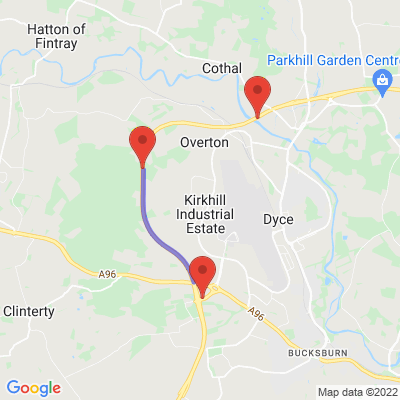

In [59]:
from IPython.display import Image
Image(map_image_address)